In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

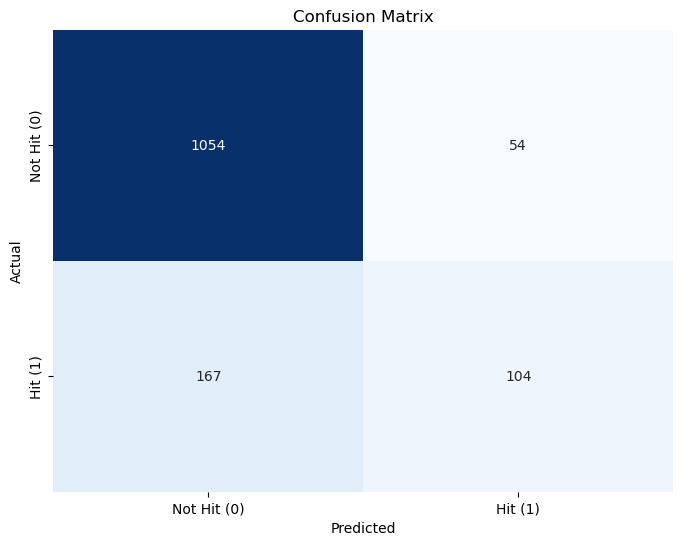

C:\Users\Lenovo Admin\AppData\Local\Temp\ipykernel_3012\1973185406.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


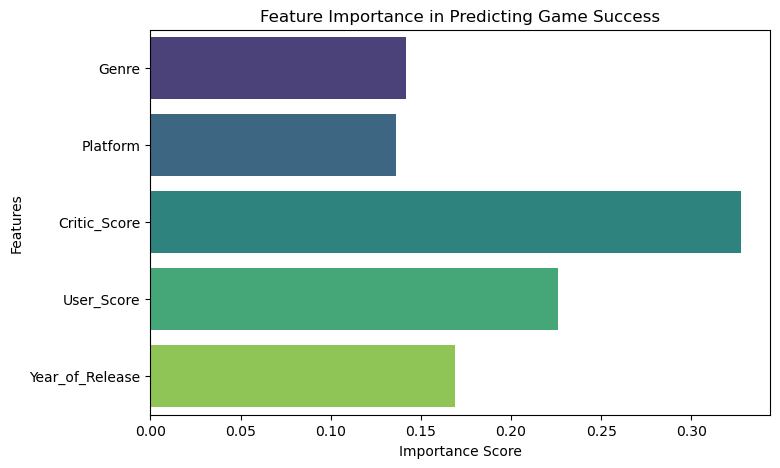


🎉 Model training complete! Saved as 'rf_game_success.pkl'


In [3]:
# ============================
#  VIDEO GAME SUCCESS PREDICTION
# ============================

# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
data = pd.read_csv("C:/Users/Lenovo Admin/Downloads/Video_Games.csv")  # Make sure your CSV is in the same directory
print(data.head())

# Step 3: Data cleaning and conversion
data['User_Score'] = pd.to_numeric(data['User_Score'], errors='coerce')
data['Critic_Score'] = pd.to_numeric(data['Critic_Score'], errors='coerce')

# Drop missing or invalid values in key columns
data = data.dropna(subset=['Global_Sales', 'Genre', 'Platform', 
                           'Critic_Score', 'User_Score', 'Year_of_Release'])

# Step 4: Encode categorical columns
label_cols = ['Genre', 'Platform', 'Publisher', 'Rating']
for col in label_cols:
    data[col] = data[col].astype(str)
    data[col] = LabelEncoder().fit_transform(data[col])
#print(data[['Genre', 'Platform','User_Score','Critic_Score', 'Publisher', 'Rating']].head(10))

# Step 5: Create the target variable
# Success = 1 if sales > 1 million, else 0
data['Success'] = data['Global_Sales'].apply(lambda x: 1 if x > 1.0 else 0)

# Step 6: Select features and target
X = data[['Genre', 'Platform', 'Critic_Score', 'User_Score', 'Year_of_Release']]
y = data['Success']

# Step 7: Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 9: Predict on test data
pred = model.predict(X_test)

# Step 10: Evaluate model
print(" Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))
cm=confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hit (0)', 'Hit (1)'], yticklabels=['Not Hit (0)', 'Hit (1)'], cbar=False)

# Step 3: Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Step 11: Visualize feature importance
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance in Predicting Game Success")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Step 12: Save the trained model for future use
pickle.dump(model, open('rf_game_success.pkl', 'wb'))

print("\n Model training complete! Saved as 'rf_game_success.pkl'")


In [1]:
# ===============================
#  TESTING GAME SUCCESS MODEL
# ===============================

import pickle
import numpy as np

# 1️) Load the saved model
model = pickle.load(open('rf_game_success.pkl', 'rb'))

# 2️) Example: new game details
# (Genre, Platform, Critic_Score, User_Score, Year_of_Release)

# NOTE: Since categorical columns were label encoded during training,
# you should use the same numeric labels (for demo we use example numbers)
# You can later map actual names -> numbers if you saved encoders.

new_game = np.array([[3, 7, 95, 8.5, 2025]])  # Example input

# 3️) Make prediction
prediction = model.predict(new_game)
print(prediction) 

# 4️) Show result
if prediction[0] == 1:
    print(" The game is likely to be a HIT!")
else:
    print(" The game may NOT perform well.")



[1]
 The game is likely to be a HIT!


C:\Users\Lenovo Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
